<a href="https://colab.research.google.com/github/bmurmann/Ngspice-on-Colab/blob/main/notebooks/GF180MCU_VGS_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GF180MCU V<sub>GS</sub> sweep

# Tool setup

In [7]:
# install conda
import os
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

# install ngspice
!conda install -c conda-forge ngspice

  Using cached condacolab-0.1.7-py3-none-any.whl (7.2 kB)
✨🍰✨ Everything looks OK!
Solving environment: \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.



In [8]:
!git clone https://github.com/google/globalfoundries-pdk-libs-gf180mcu_fd_pr.git

fatal: destination path 'globalfoundries-pdk-libs-gf180mcu_fd_pr' already exists and is not an empty directory.


# Simulation

In [9]:
%%writefile .spiceinit
set ngbehavior=hs

Writing .spiceinit


In [10]:
%%writefile netlist.spice
* PMOS VGS sweep

.include "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/design.ngspice"
.lib "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/sm141064.ngspice" typical

.param width=10u
X1 vdp vgp 0 vbp pmos_3p3 w=width l=0.28u AD={width*0.24u} AS={width*0.24u} PD={2*(width + 0.24u)} PS={2*(width + 0.24u)}
vsdp     0  vdp        dc 0.9
vsgp     0  vgp        dc 0.9
vsbp     0  vbp        dc 0
.op
.option post nomod
.end

.control
save all @m.x1.m0[gm] @m.x1.m0[id]  @m.x1.m0[cgg]
dc vsgp 0 1.8 0.01
display
wrdata output.txt @m.x1.m0[gm] @m.x1.m0[id]  @m.x1.m0[cgg]
.endc

Overwriting netlist.spice


In [16]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs



Circuit: * pmos vgs sweep

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 181
Here are the vectors currently active:

Title: * pmos vgs sweep
Name: dc1 (DC transfer characteristic)
Date: Mon Dec  4 16:37:01  2023

    @m.x1.m0[cgg]       : capacitance, real, 181 long
    @m.x1.m0[gm]        : admittance, real, 181 long
    @m.x1.m0[id]        : current, real, 181 long
    v-sweep             : voltage, real, 181 long [default scale]
    vbp                 : voltage, real, 181 long
    vdp                 : voltage, real, 181 long
    vgp                 : voltage, real, 181 long
    vsbp#branch         : current, real, 181 long
    vsdp#branch         : current, real, 181 long
    vsgp#branch         : current, real, 181 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vb

In [12]:
import math
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vsg", "gm", "vsg1", "id", "vsg2", "cgg"]
df['gm_id'] = df['gm']/df['id']
df['f_T'] = df['gm']/df['cgg']/2/math.pi
df

,vsg,gm,vsg1,id,vsg2,cgg,gm_id,f_T
0,0.00,5.889080e-13,0.00,2.187749e-14,0.00,5.095108e-15,26.918443,1.839561e+01
1,0.01,7.708124e-13,0.01,2.863534e-14,0.01,5.072064e-15,26.918221,2.418712e+01
2,0.02,1.008901e-12,0.02,3.748057e-14,0.02,5.049440e-15,26.917966,3.179987e+01
3,0.03,1.320524e-12,0.03,4.905788e-14,0.03,5.027238e-15,26.917674,4.180585e+01
4,0.04,1.728392e-12,0.04,6.421109e-14,0.04,5.005460e-15,26.917338,5.495640e+01
...,...,...,...,...,...,...,...,...
176,1.76,8.070958e-04,1.76,5.623023e-04,1.76,9.708690e-15,1.435341,1.323075e+10
177,1.77,8.074865e-04,1.77,5.703754e-04,1.77,9.713691e-15,1.415711,1.323034e+10
178,1.78,8.077003e-04,1.78,5.784514e-04,1.78,9.718857e-15,1.396315,1.322681e+10
179,1.79,8.077368e-04,1.79,5.865288e-04,1.79,9.724198e-15,1.377148,1.322014e+10


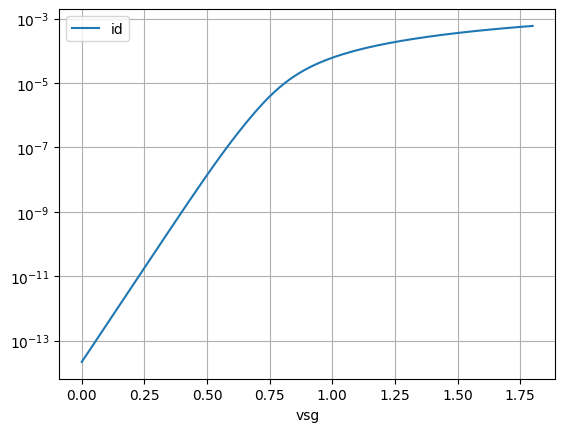

In [13]:
df.plot(x="vsg", y="id", logy=True, grid=True)
plt.show()

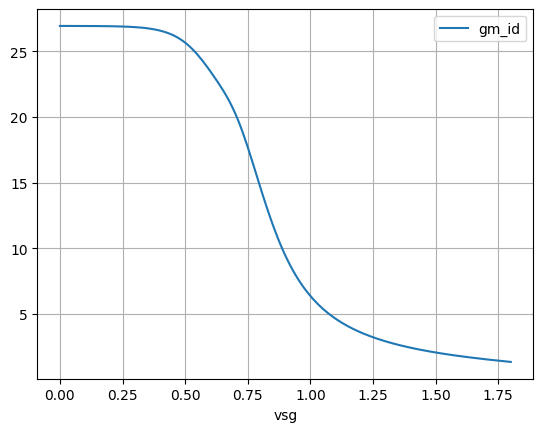

In [14]:
df.plot(x="vsg", y="gm_id", grid=True)
plt.show()

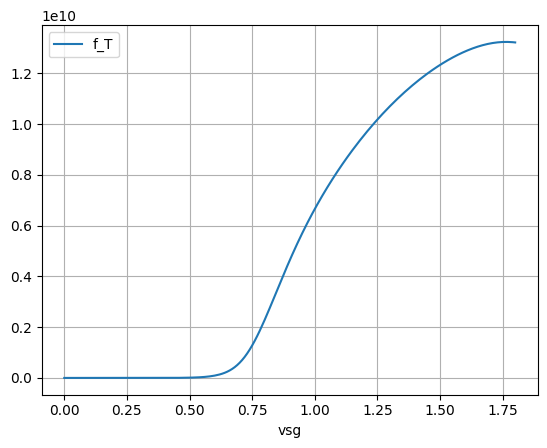

In [15]:
df.plot(x="vsg", y="f_T", grid=True)
plt.show()